# Armenian pubs
Working with data using Jupyter Notebook and some Python's libraries.
The $k$ Nearest Neighbours($k$NN) method to analyze data from online survey questionnaire about Armenian pubs.

This dataset contains information about age, gender, occupation, monthly income of respondents, their favorite pubs, frequency of visits, maximum amount that respondent ready to spend in the pub, an important features of the pub, the respondent's lifestyle and the regional stratum the respondent comes from, as well as occasions that the respondent goes to pubs most of the time.

First we import the needed Python's libraries:

In [1]:
import numpy
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Open file $armenian\_pubs.csv$ with dataset to read. The file is in current directory.

In [2]:
filename = './armenian_pubs.csv'
dataset = pd.read_csv(filename, sep = ',', engine = 'python')

Now we can see the file contains and type of data

In [3]:
type(dataset)

pandas.core.frame.DataFrame

Display data using standart Python's print:

In [4]:
print(dataset)

                        Timestamp  Age  Gender    Income          Occupation  \
0    2017/02/25 10:52:03 PM GMT+4    19    Male  100000.0            Student   
1    2017/02/25 10:53:19 PM GMT+4    19  Female   50000.0            Student   
2    2017/02/25 10:54:05 PM GMT+4    20    Male  100000.0            Student   
3    2017/02/25 10:55:09 PM GMT+4    18    Male       0.0            Student   
4    2017/02/25 10:55:38 PM GMT+4    19  Female  130000.0  Student + working   
5    2017/02/25 10:55:39 PM GMT+4    19    Male   90000.0            Student   
6    2017/02/25 10:55:41 PM GMT+4    18  Female       0.0            Student   
7    2017/02/25 10:55:45 PM GMT+4    19  Female       0.0            Student   
8    2017/02/25 10:56:17 PM GMT+4    19    Male   80000.0  Student + working   
9    2017/02/25 10:56:45 PM GMT+4    19    Male  150000.0            Student   
10   2017/02/25 10:56:52 PM GMT+4    20  Female   80000.0            Student   
11   2017/02/25 10:56:56 PM GMT+4    18 

The same using Jupyter Notebook:

In [5]:
dataset

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
0,2017/02/25 10:52:03 PM GMT+4,19,Male,100000.0,Student,Station,2000.0,Several times in a month,Environment,Menu,Capital,Nightlife,Hang outs with friends
1,2017/02/25 10:53:19 PM GMT+4,19,Female,50000.0,Student,Calumet,2000.0,rarely (once two week/or a month),Music,Pricing,Capital,Adventure/traveling/exploring,Hang outs with friends
2,2017/02/25 10:54:05 PM GMT+4,20,Male,100000.0,Student,Liberty,3000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
3,2017/02/25 10:55:09 PM GMT+4,18,Male,0.0,Student,Calumet,3000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
4,2017/02/25 10:55:38 PM GMT+4,19,Female,130000.0,Student + working,Liberty,10000.0,rarely (once two week/or a month),Pricing,Environment,Capital,NaN,Hang outs with friends
5,2017/02/25 10:55:39 PM GMT+4,19,Male,90000.0,Student,Station,2000.0,Several times a week,Environment,Menu,Capital,Adventure/traveling/exploring,Hang outs with friends
6,2017/02/25 10:55:41 PM GMT+4,18,Female,0.0,Student,Irish,1000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
7,2017/02/25 10:55:45 PM GMT+4,19,Female,0.0,Student,Station,2000.0,Several times in a month,Environment,Pricing,Capital,"Busy(student life, work)",Hang outs with friends
8,2017/02/25 10:56:17 PM GMT+4,19,Male,80000.0,Student + working,I don't like pubs,10000.0,rarely (once two week/or a month),Environment,Music,Capital,Adventure/traveling/exploring,Hang outs with friends
9,2017/02/25 10:56:45 PM GMT+4,19,Male,150000.0,Student,Irish,3000.0,Several times in a month,Environment,Music,Capital,Nightlife,Hang outs with friends


We have got the table of data. The size of the table: 175 rows and 13 columns.
First line contains the names of columns:
<table>
    <tr>
        <td>Timestamp</td> <td>Date and time of respondent's submission</td> <td>string</td>
    </tr>
    <tr>
        <td>Age</td> <td>Respondent's age</td> <td>numeric</td>
    </tr>
    <tr>
        <td>Gender</td> <td>Respondent's gender</td> <td>string</td>
    </tr>
    <tr>
        <td>Income</td> <td>Respondent's approximate Monthly Income (in Armenian Dram)</td> <td>numeric</td>
    </tr>
    <tr>
        <td>Occupation</td> <td>Respondent's Occupation</td> <td>string</td>
    </tr>
    <tr>
        <td>Fav_Pub</td> <td>Respondent's Favorite Pub</td> <td>string</td>
    </tr>
    <tr>
        <td>WTS</td> <td>Respondent's maximum willingness to spend at the pub</td> <td>numeric</td>
    </tr>
    <tr>
        <td>Freq</td> <td>How often the respondnet visit pubs</td> <td>string</td>
    </tr>
    <tr>
        <td>Prim_Imp</td> <td>Feature of primary importantance for the respondent?</td> <td>string</td>
    </tr>
    <tr>
        <td>Sec_Imp</td> <td>Feature of secondary importantance for the respondent</td> <td>string</td>
    </tr>
    <tr>
        <td>Stratum</td> <td>The regional stratum the respondent comes from</td> <td>string</td>
    </tr>
    <tr>
        <td>Lifestyle</td> <td>Respondent's lifestyle</td> <td>string</td>
    </tr>
    <tr>
        <td>Occasions</td> <td>Occasions that the respondent goes to pubs most of the time</td> <td>string</td>
    </tr>
</table>
Other lines are directly contains a respondents answers. It is string and numeric data.

We can display first 5 or last 5 rows by using $head$ and $tail$ methods respectively, not all data rows:

In [6]:
dataset.head()

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
0,2017/02/25 10:52:03 PM GMT+4,19,Male,100000.0,Student,Station,2000.0,Several times in a month,Environment,Menu,Capital,Nightlife,Hang outs with friends
1,2017/02/25 10:53:19 PM GMT+4,19,Female,50000.0,Student,Calumet,2000.0,rarely (once two week/or a month),Music,Pricing,Capital,Adventure/traveling/exploring,Hang outs with friends
2,2017/02/25 10:54:05 PM GMT+4,20,Male,100000.0,Student,Liberty,3000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
3,2017/02/25 10:55:09 PM GMT+4,18,Male,0.0,Student,Calumet,3000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
4,2017/02/25 10:55:38 PM GMT+4,19,Female,130000.0,Student + working,Liberty,10000.0,rarely (once two week/or a month),Pricing,Environment,Capital,NaN,Hang outs with friends


In [7]:
dataset.tail()

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
170,2017/03/03 8:50:35 AM GMT+4,19,Female,10000.0,Student,Station,2000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
171,2017/03/03 9:08:33 AM GMT+4,20,Female,0.0,Student,Station,0.0,Several times in a month,Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
172,2017/03/03 8:59:05 PM GMT+4,20,Female,80000.0,Student + working,Tom Collins,5000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
173,2017/03/04 3:32:37 AM GMT+4,19,Male,0.0,Student,Fiction,5500.0,Several times a week,Pricing,Music,Capital,"Rock, punk",Hang outs with friends
174,2017/03/05 9:45:11 PM GMT+4,22,Female,120000.0,Student + working,Beatles,5000.0,Several times in a month,Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends


Also we can display it for needed columns only, for example, to print first five rows in columns named 'Income' and 'Occupation'. But get a correct names of columns at first:

In [8]:
print(dataset.columns)

Index([u'Timestamp', u'Age ', u'Gender ', u'Income ', u' Occupation',
       u'Fav_Pub', u'WTS', u'Freq', u'Prim_Imp', u'Sec_Imp', u'Stratum',
       u'Lifestyle', u'Occasions'],
      dtype='object')


Some names has a space symbols, rename the columns for usability:

In [9]:
dataset.columns = [u'time', u'age', u'gender', u'income', u'occupation', u'fav_pub',
                   u'wts', u'freq', u'1imp', u'2imp', u'stratum', u'life', u'occasions']

Now we can access a columns by new names.

In [10]:
dataset[['income','occupation']].head()

,income,occupation
0,100000.0,Student
1,50000.0,Student
2,100000.0,Student
3,0.0,Student
4,130000.0,Student + working


Print full column:

In [11]:
dataset['time']

0      2017/02/25 10:52:03 PM GMT+4
1      2017/02/25 10:53:19 PM GMT+4
2      2017/02/25 10:54:05 PM GMT+4
3      2017/02/25 10:55:09 PM GMT+4
4      2017/02/25 10:55:38 PM GMT+4
5      2017/02/25 10:55:39 PM GMT+4
6      2017/02/25 10:55:41 PM GMT+4
7      2017/02/25 10:55:45 PM GMT+4
8      2017/02/25 10:56:17 PM GMT+4
9      2017/02/25 10:56:45 PM GMT+4
10     2017/02/25 10:56:52 PM GMT+4
11     2017/02/25 10:56:56 PM GMT+4
12     2017/02/25 10:57:00 PM GMT+4
13     2017/02/25 10:57:58 PM GMT+4
14     2017/02/25 10:58:12 PM GMT+4
15     2017/02/25 10:58:19 PM GMT+4
16     2017/02/25 10:59:18 PM GMT+4
17     2017/02/25 10:59:25 PM GMT+4
18     2017/02/25 10:59:28 PM GMT+4
19     2017/02/25 10:59:52 PM GMT+4
20     2017/02/25 10:59:59 PM GMT+4
21     2017/02/25 11:01:22 PM GMT+4
22     2017/02/25 11:02:07 PM GMT+4
23     2017/02/25 11:02:13 PM GMT+4
24     2017/02/25 11:02:28 PM GMT+4
25     2017/02/25 11:05:04 PM GMT+4
26     2017/02/25 11:05:10 PM GMT+4
27     2017/02/25 11:05:29 P

Getting a subset of column (12-19th elements in this case):

In [12]:
dataset['time'][12:20]

12    2017/02/25 10:57:00 PM GMT+4
13    2017/02/25 10:57:58 PM GMT+4
14    2017/02/25 10:58:12 PM GMT+4
15    2017/02/25 10:58:19 PM GMT+4
16    2017/02/25 10:59:18 PM GMT+4
17    2017/02/25 10:59:25 PM GMT+4
18    2017/02/25 10:59:28 PM GMT+4
19    2017/02/25 10:59:52 PM GMT+4
Name: time, dtype: object

or one element from column:

In [13]:
print(dataset['time'][76]) #Python
dataset.at[76,'time'] #Jupyter Notebook


2017/02/26 1:15:32 AM GMT+4


'2017/02/26 1:15:32 AM GMT+4'

Check a type of element:

In [14]:
type(dataset['time'][12])


str

or type of columns:

In [15]:
print(dataset['time'].dtype.name) 
type(dataset['time'])

object


pandas.core.series.Series

# Data analysis and plotting.


Use the method $describe()$ to get some statistic parameters: mean, standart deviation, mediane, 25% and 75% percentiles.
And this method print minimum and maximum values and count of elements. It is working for numerical columns only.

In [16]:
dataset.describe()

,age,income,wts
count,175.000000,1.740000e+02,172.000000
mean,19.548571,1.101977e+05,4831.395349
std,2.770262,3.576027e+05,4323.951020
min,16.000000,0.000000e+00,0.000000
25%,18.000000,1.000000e+02,2000.000000
50%,19.000000,5.500000e+04,4000.000000
75%,20.000000,1.000000e+05,5000.000000
max,41.000000,4.500000e+06,30000.000000


Also we can get correlation for this columns using $corr()$:

In [17]:
dataset.corr()

,age,income,wts
age,1.000000,0.163399,0.134111
income,0.163399,1.000000,0.228340
wts,0.134111,0.228340,1.000000


Now consider how to display the income/age relation on the plot.
In function $plot()$ we can set color of points, opacity, symbols etc.
Set the title of plot as "Relation between age and income".
Set the labels of X and Y axis as "Age" and "Income" respectively.


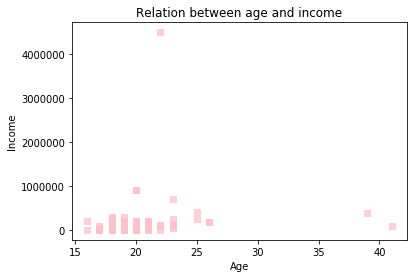

In [18]:
plt.plot(dataset['age'],dataset['income'],'s', alpha = 0.7, color='pink')
plt.title("Relation between age and income")
plt.xlabel("Age")
plt.ylabel("Income")

Also we can make a scatter plot for variables '$income$' and '$wts$' for men and women. Parameter 'gender' in dataset takes '$Male$' and '$Female$' values, we can use it to select needed values for both scatter plots. Set label 'Men' and blue color for first plot,and 'Women' and pink color for second plot. Set labels for axis and display legend. Let limit X axis to 750000.
The function $grid()$ displays a grid cells.

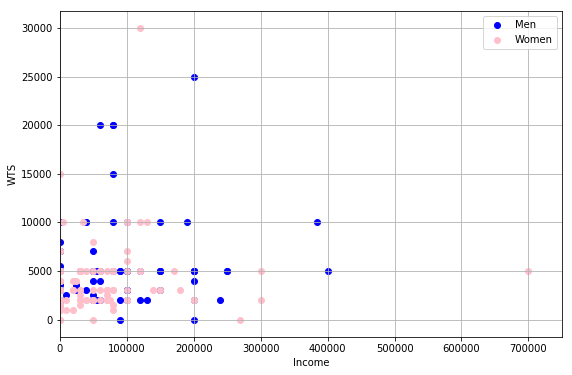

In [19]:
plt.figure(figsize = (9, 6))
plt.scatter(dataset[dataset['gender'] == 'Male']['income'],
            dataset[dataset['gender'] == 'Male']['wts'],
            alpha = 1,
            label = 'Men',
            color = 'blue')

plt.scatter(dataset[dataset['gender'] == 'Female']['income'],
            dataset[dataset['gender'] == 'Female']['wts'],
            alpha = 1,
            label = 'Women',
            color = 'pink')

plt.xlabel('Income')
plt.ylabel('WTS')
plt.xlim(0,750000)
plt.legend()
plt.grid()


# Preprocessing data

First check columns for NaN values. If column has NaN values we need to fill this values with some data. For example we can use mean values to do.

In [20]:
dataset.count(axis = 0)

time          175
age           175
gender        175
income        174
occupation    175
fav_pub       168
wts           172
freq          175
1imp          175
2imp          175
stratum       175
life          169
occasions     173
dtype: int64

In [21]:
mean_income = dataset['income'].mean(axis = 0) 
dataset['income'] = map(lambda x: mean_income if numpy.isnan(dataset['income'][x])
                        else dataset['income'][x],range(len(dataset['income'])))

In [22]:
mean_wts = dataset['wts'].mean(axis = 0) 
dataset['wts'] = map(lambda x: mean_income if numpy.isnan(dataset['wts'][x])
                        else dataset['wts'][x],range(len(dataset['wts'])))

Now we need to transform non-numeric columns by replacing unique string with number. We will use $pandas$ 

In [23]:
ds_gender = pd.get_dummies(dataset['gender'])
dataset=dataset.drop(['gender'], axis = 1)
dataset = dataset.join(ds_gender)
# ds_gender

If dataset has many different elements and we want to see all unique elements, we can use $unique()$ for needed column.

In [24]:
dataset['freq'].unique()

array(['Several times in a month', 'rarely (once two week/or a month)',
       'Several times a week'], dtype=object)

In [25]:
ds_freq = pd.get_dummies(dataset['freq'])
dataset=dataset.drop(['freq'], axis = 1)
dataset = dataset.join(ds_freq)

In [26]:
dataset['1imp'].unique()

array(['Environment', 'Music', 'Pricing', 'Menu'], dtype=object)

In [27]:
ds_1imp = pd.get_dummies(dataset['1imp'])
dataset=dataset.drop(['1imp'], axis = 1)
dataset = dataset.join(ds_1imp)

In [28]:
dataset['stratum'].unique()

array(['Capital', 'Urban', 'Rural'], dtype=object)

In [29]:
ds_stratum = pd.get_dummies(dataset['stratum'])
dataset=dataset.drop(['stratum'], axis = 1)
dataset = dataset.join(ds_stratum)

In [30]:
dataset['2imp'].unique()

array(['Menu', 'Pricing', 'Music', 'Environment'], dtype=object)

In [31]:
# ds_2imp = pd.get_dummies(dataset['2imp'])
# ds_2imp
dataset=dataset.drop(['2imp'], axis = 1)
# dataset = dataset.join(ds_2imp)

In [32]:
dataset['occasions'].unique()

array(['Hang outs with friends', 'Special events/parties', 'Birthdays',
       'Never', 'chem aycelum', 'Nowere', nan, 'For listening  good music '], dtype=object)

In [33]:
ds_occasions = pd.get_dummies(dataset['occasions'])
dataset=dataset.drop(['occasions'], axis = 1)
dataset = dataset.join(ds_occasions)

In [34]:
dataset['occupation'].unique()

array(['Student', 'Student + working', 'Working', 'CEO',
       'Entrepreneur / Software Engineer', 'army', 'Working '], dtype=object)

In [35]:
ds_occupation = pd.get_dummies(dataset['occupation'])
dataset=dataset.drop(['occupation'], axis = 1)
dataset = dataset.join(ds_occupation)

In [36]:
dataset['fav_pub'].unique()

array(['Station', 'Calumet', 'Liberty', 'Irish', "I don't like pubs",
       'Venue', 'VOID', 'DAS', '37 pub', 'Venue ', 'Cantaloupe', nan,
       'Tom Collins ', 'Bulldog', 'Pepper', 'Eden', 'Liberty ',
       'Hemingway', 'Void', 'I have none', 'Pub 37', 'Red bull', 'Varonna',
       'Barcode', 'Paparazzi ', 'Pechenu bagher', 'Dargett', 'Pub 007',
       'Do not have one', 'kaptyorka', 'DAS ', 'Paulaner', 'Wild west',
       'BullDog', 'Tom collins', "Bob's", 'Fiction', 'Tom Collins',
       'The beatles', 'Ulixanyan art club', 'Simona', 'Speak Easy ',
       'Beer Academy', 'Yankee', 'Beatles'], dtype=object)

The column contains a similar names of pubs, so we need to fix it by transforming names to lower register and deleting extra spaces. 

In [39]:
dataset['fav_pub']=map(lambda s: str(s).lower().strip(),[dataset['fav_pub'][i] for i in range(len(dataset['fav_pub']))])

Transform column to categorial and join it to table

In [40]:
ds_fav_pub = pd.get_dummies(dataset['fav_pub'])
dataset=dataset.drop(['fav_pub'], axis = 1)
dataset = dataset.join(ds_fav_pub)

We won't to use 'time' and 'life'  columns in our analysis, so we can delete it.

In [41]:

dataset=dataset.drop(['life'], axis = 1)

dataset

,time,age,income,wts,Female,Male,Several times a week,Several times in a month,rarely (once two week/or a month),Environment,...,speak easy,station,the beatles,tom collins,ulixanyan art club,varonna,venue,void,wild west,yankee
0,2017/02/25 10:52:03 PM GMT+4,19,100000.0,2000.000000,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2017/02/25 10:53:19 PM GMT+4,19,50000.0,2000.000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017/02/25 10:54:05 PM GMT+4,20,100000.0,3000.000000,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2017/02/25 10:55:09 PM GMT+4,18,0.0,3000.000000,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2017/02/25 10:55:38 PM GMT+4,19,130000.0,10000.000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2017/02/25 10:55:39 PM GMT+4,19,90000.0,2000.000000,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6,2017/02/25 10:55:41 PM GMT+4,18,0.0,1000.000000,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2017/02/25 10:55:45 PM GMT+4,19,0.0,2000.000000,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
8,2017/02/25 10:56:17 PM GMT+4,19,80000.0,10000.000000,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,2017/02/25 10:56:45 PM GMT+4,19,150000.0,3000.000000,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dataset = dataset.drop(['time'], axis = 1)


Now all columns in dataset are numeric(float64):

In [43]:
dataset.median(axis = 0)

age                                     19.0
income                               55000.0
wts                                   4000.0
Female                                   1.0
Male                                     0.0
Several times a week                     0.0
Several times in a month                 0.0
rarely (once two week/or a month)        1.0
Environment                              1.0
Menu                                     0.0
Music                                    0.0
Pricing                                  0.0
Capital                                  1.0
Rural                                    0.0
Urban                                    0.0
Birthdays                                0.0
For listening  good music                0.0
Hang outs with friends                   1.0
Never                                    0.0
Nowere                                   0.0
Special events/parties                   0.0
chem aycelum                             0.0
CEO       

We normalize columns contained quantitative characteristics: 'income' and 'wts', because some methods may be sensitive to scaling.

In [44]:
dataset['income'] = (dataset['income']-dataset['income'].mean(axis = 0))/dataset['income'].std(axis = 0)
dataset['wts'] = (dataset['wts']-dataset['wts'].mean(axis = 0))/dataset['wts'].std(axis = 0)
# dataset['wts'] = dataset['wts']/dataset['wts'].max(axis = 0)
# dataset['income'] = dataset['income']/dataset['income'].max(axis = 0)

Drop the outlier points:

In [45]:
dataset=dataset.drop(dataset[dataset['income']>3*dataset['income'].std(axis = 0)].index)
dataset=dataset.drop(dataset[dataset['wts']>3*dataset['wts'].std(axis = 0)].index)

# The kNN method
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.


Suppose we want to know the regional stratum the respondent comes from: capitale(1),urban(2) or rural(3). Let y as 'stratum' column and x is the rest columns.

In [46]:
x = dataset.drop('Male', axis = 1)
y = dataset['Male']
dataset.count()

age                                  171
income                               171
wts                                  171
Female                               171
Male                                 171
Several times a week                 171
Several times in a month             171
rarely (once two week/or a month)    171
Environment                          171
Menu                                 171
Music                                171
Pricing                              171
Capital                              171
Rural                                171
Urban                                171
Birthdays                            171
For listening  good music            171
Hang outs with friends               171
Never                                171
Nowere                               171
Special events/parties               171
chem aycelum                         171
CEO                                  171
Entrepreneur / Software Engineer     171
Student         

We need to split our set of data to 'train' and 'test' subsets (by 70% and 30% from common data respectively). We will fit classifier on 'train' subset and check it on 'test' subset.

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 33)

size_train, _ = x_train.shape 
size_test,  _ = x_test.shape 

print('Size of test and train sets: ', size_test, size_train)



('Size of test and train sets: ', 52, 119)


Begining of algorithm. Let parameter $k$ = 1 (count of neighbors) and create a classifier:

In [48]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Get standard errors for train and test sets

In [49]:
y_train_predict = knn.predict(x_train)
y_test_predict = knn.predict(x_test)

err_train = numpy.mean(y_train != y_train_predict)
err_test  = numpy.mean(y_test  != y_test_predict)

print('errors: ',err_train, err_test)



('errors: ', 0.0, 0.11538461538461539)


error of train set << error of test set, it is overfitting. We need to fit parameter $k$ where both of errors is optimal.

In [50]:
from sklearn.model_selection import GridSearchCV
k = range(1,20)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': k}, cv=10)
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_k = grid.best_estimator_.n_neighbors
print(best_cv_err, best_k)

(0.13445378151260501, 15)


We obtain the optimal value of $k$ is 15 and 13% errors ratio.

In [51]:
knn = KNeighborsClassifier(n_neighbors = best_k).fit(x_train, y_train)

err_train = numpy.mean(y_train != knn.predict(x_train))
err_test  = numpy.mean(y_test  != knn.predict(x_test))

print(err_train, err_test)

(0.13445378151260504, 0.15384615384615385)


Errors between real and predicted values for 'train' and 'test' sets have a little differences

*I have learn english in russian school)